In [2]:
import shap
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import Ridge



import warnings
warnings.filterwarnings('ignore')

In [3]:
train_test_dummy=pd.read_csv('train_test_dummy.csv')
train_test=pd.read_csv('train_test.csv')

In [4]:
train_test.iloc[3999:4005]

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,renovated
3999,1459,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,6,2008,WD,Normal,139.555556,56,2.5,1256,3930
4000,0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,128.000000,56,1.0,896,3922
4001,1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,147.666667,66,1.5,1329,3916
4002,2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,162.900000,55,2.5,1629,3995
4003,3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,145.818182,66,2.5,1604,3996
4004,4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,160.000000,85,2.0,1280,3984


In [5]:
train_test=train_test.iloc[:,1:]

In [6]:
train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,renovated
0,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,...,0,5,2010,WD,Normal,184.000000,65,2.0,1656,3920
1,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,0,6,2010,WD,Normal,128.000000,56,1.0,896,3922
2,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,12500,6,2010,WD,Normal,147.666667,66,1.5,1329,3916
3,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,Corner,...,0,4,2010,WD,Normal,175.833333,75,3.5,2110,3936
4,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,3,2010,WD,Normal,162.900000,55,2.5,1629,3995


In [7]:
train_test_dummy.head()

,Unnamed: 0,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Total_Home_Quality_79,Total_Home_Quality_84,Total_Home_Quality_85,Total_Home_Quality_86,Total_Home_Quality_87,Total_Home_Quality_88,Total_Home_Quality_89,Total_Home_Quality_92,Total_Home_Quality_93,Total_Home_Quality_95
0,0,4.955827,10.366309,1960,4.727388,6.461468,0.000000,6.091310,6.985642,7.412764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4.394449,9.360741,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4.406719,9.565775,1958,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.543295,9.320181,1968,0.000000,6.971669,0.000000,6.952729,7.654917,7.654917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.317488,9.534668,1997,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train_test_dummy=train_test_dummy.iloc[:,1:]

In [9]:
train_test_dummy.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Total_Home_Quality_79,Total_Home_Quality_84,Total_Home_Quality_85,Total_Home_Quality_86,Total_Home_Quality_87,Total_Home_Quality_88,Total_Home_Quality_89,Total_Home_Quality_92,Total_Home_Quality_93,Total_Home_Quality_95
0,4.955827,10.366309,1960,4.727388,6.461468,0.000000,6.091310,6.985642,7.412764,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.394449,9.360741,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.406719,9.565775,1958,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.543295,9.320181,1968,0.000000,6.971669,0.000000,6.952729,7.654917,7.654917,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.317488,9.534668,1997,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Train-Test separation

X_train = train_test_dummy[0:4000]
X_test = train_test_dummy[4000:]

# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [11]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Total_Home_Quality_79,Total_Home_Quality_84,Total_Home_Quality_85,Total_Home_Quality_86,Total_Home_Quality_87,Total_Home_Quality_88,Total_Home_Quality_89,Total_Home_Quality_92,Total_Home_Quality_93,Total_Home_Quality_95
0,4.955827,10.366309,1960,4.727388,6.461468,0.000000,6.091310,6.985642,7.412764,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.394449,9.360741,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.406719,9.565775,1958,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.543295,9.320181,1968,0.000000,6.971669,0.000000,6.952729,7.654917,7.654917,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.317488,9.534668,1997,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_test.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Total_Home_Quality_79,Total_Home_Quality_84,Total_Home_Quality_85,Total_Home_Quality_86,Total_Home_Quality_87,Total_Home_Quality_88,Total_Home_Quality_89,Total_Home_Quality_92,Total_Home_Quality_93,Total_Home_Quality_95
4000,4.394449,9.360741,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4001,4.406719,9.565775,1958,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,4.317488,9.534668,1997,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4003,4.369448,9.208238,1998,3.044522,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4004,3.784190,8.518392,1992,0.000000,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,...,0.0,0.0,0.6934,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
target_log=pd.read_csv('target_log.csv')

In [14]:
target_log.head()

,Unnamed: 0,SalePrice
0,0,12.278398
1,1,11.561725
2,2,12.055256
3,3,12.404928
4,4,12.154258


In [15]:
target_log=target_log['SalePrice']

In [16]:
#checking for nan values in training set
nan=pd.DataFrame(X_train.isna().sum(),columns=['Nan_sum'])
nan['feat']=nan.index
nan=nan[nan['Nan_sum']>0]
nan['Percentage']=(nan['Nan_sum']/1460)*100
nan['Perc']=(nan['Nan_sum']/4000)*100
nan=nan.sort_values(by=['Nan_sum'])
nan.insert(0,'Serial No.',range(1,len(nan)+1))
nan

,Serial No.,Nan_sum,feat,Percentage,Perc


In [17]:
#checking for nan values in test set
nan=pd.DataFrame(X_test.isna().sum(),columns=['Nan_sum'])
nan['feat']=nan.index
nan=nan[nan['Nan_sum']>0]
nan['Percentage']=(nan['Nan_sum']/1460)*100
nan['Perc']=(nan['Nan_sum']/2919)*100
nan=nan.sort_values(by=['Nan_sum'])
nan.insert(0,'Serial No.',range(1,len(nan)+1))
nan

,Serial No.,Nan_sum,feat,Percentage,Perc


In [18]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True) # any integer

# K-Folds cross-validator: Provides train/test indices to split data in train/test sets. 
# please read the material: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [19]:
# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
print(score_lreg.mean())
print(score_lreg.std())

0.116954837690878
0.016314114712675205


In [20]:
# every time you build a model, please make prediction on test dataset and make a submission.
submission = pd.read_csv("sample_submission.csv")
lreg_model=lreg.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(lreg_model.predict(X_test)))
print(submission.head())
submission.to_csv("sub_lreg.csv", index=False)  #0.11396

     Id  SalePrice
0  1461   124341.0
1  1462   164845.0
2  1463   188212.0
3  1464   200409.0
4  1465   194589.0


In [21]:
# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html
print(score_brr.mean())
print(score_brr.std())

0.11329909426169982
0.01683302238587037


In [22]:
submission = pd.read_csv("sample_submission.csv")
brr_model=brr.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(brr_model.predict(X_test)))
print(submission.head())
submission.to_csv("sub_brr.csv", index=False) 

     Id  SalePrice
0  1461   121171.0
1  1462   156812.0
2  1463   187420.0
3  1464   199343.0
4  1465   195217.0


In [23]:
# try ridge and lasso regression, use grid search to find the best alpha value for the two regression
# print the cv mean and std
# make submission on test dataset, see the submission socre.

In [24]:
# ridge
#Grid Search Parameter Tuning
# prepare a range of alpha values to test
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001]) # pick 100 random values from 0.0001 to 1
# create and fit a ridge regression model, testing each alpha
model1 = Ridge()
grid1 = GridSearchCV(estimator=model1, param_grid=dict(alpha=alphas),cv=10,scoring='neg_mean_squared_error')
grid1.fit(X_train,target_log)
print(grid1)
# summarize the results of the grid search
print(grid1.best_score_)
print(grid1.best_estimator_.alpha)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])},
             scoring='neg_mean_squared_error')
-0.012917861310531487
1.0


In [25]:
ridge = Ridge(alpha=1.0)
score_ridge = cv_rmse(ridge)
print(score_ridge.mean())
print(score_ridge.std())

0.11270196015318223
0.016764755040066786


In [26]:
submission = pd.read_csv("sample_submission.csv")
ridge_model=ridge.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(ridge_model.predict(X_test)))
print(submission.head())
submission.to_csv("sub_ridge.csv", index=False) 

     Id  SalePrice
0  1461   120660.0
1  1462   155757.0
2  1463   187403.0
3  1464   199214.0
4  1465   195389.0


In [27]:
# lasso
from sklearn.linear_model import Lasso
#Grid Search Parameter Tuning
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001]) # pick 100 random values from 0.0001 to 1
# create and fit a lasso regression model, testing each alpha
model3 = Lasso()
grid3 = GridSearchCV(estimator=model3, param_grid=dict(alpha=alphas), cv=10,scoring='neg_mean_squared_error')
grid3.fit(X_train,target_log)
print(grid3)
# summarize the results of the grid search
print(grid3.best_score_)
print(grid3.best_estimator_.alpha)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])},
             scoring='neg_mean_squared_error')
-0.013400031557367544
0.0001


In [28]:
lasso = Ridge(alpha=0.0001)
score_lasso = cv_rmse(lasso)
print(score_lasso.mean())
print(score_lasso.std())

0.11695057129702366
0.016312416984760335


In [29]:
submission = pd.read_csv("sample_submission.csv")
lasso_model=lasso.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(lasso_model.predict(X_test)))
print(submission.head())
submission.to_csv("sub_lasso.csv", index=False) 

     Id  SalePrice
0  1461   124341.0
1  1462   164842.0
2  1463   188212.0
3  1464   200408.0
4  1465   194588.0


In [30]:
# Light Gradient Boost Regressor
#https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
print(score_l_gbm.mean())
print(score_l_gbm.std())

0.09708838509719628
0.018493668323074954


In [31]:
# bayesian optimization
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from math import sqrt
import lightgbm as lgb

In [32]:
X_train.shape

(4000, 429)

In [53]:
# you can change values for learning rate (float), bagging_freq (any integer), bagging_seed (any integer) and feature_fraction_seed (any integer)
# you can control init_round (any integer) and opt_round (any integer)
def bayes_parameter_opt_lgb(X, y, init_round=3, opt_round=17, n_folds=10, random_seed=42, n_estimators=10000, learning_rate=0.01,bagging_freq=5,bagging_seed=7,feature_fraction_seed=7):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y)
    # parameters
    def lgb_eval(num_leaves, max_depth, min_data_in_leaf,bagging_fraction, feature_fraction):
        params = {'objective':'regression','boosting_type': 'gbdt', 'verbose': -1,\
                  'num_boost_round': n_estimators, 'learning_rate':learning_rate,
                  'bagging_freq':bagging_freq,'bagging_seed':bagging_seed, 'feature_fraction_seed':feature_fraction_seed,'feature_pre_filter':False}
        params["num_leaves"] = int(round(num_leaves))
        params['max_depth']=int(round(max_depth))
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params["min_data_in_leaf"] = int(round(min_data_in_leaf))
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=False, verbose_eval=500, metrics=['rmse'],early_stopping_rounds=50)
        return -1.0 * np.min(cv_result['rmse-mean'])
    # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (50, 80),  # you can try different value range 
                                            'max_depth':(3, 7),  # you can try different value range 
                                            'min_data_in_leaf':(50,120),
                                            #'feature_pre_filter':True,  # you can try different value range 
                                            'bagging_fraction' : (0.1,0.9), # you can try different value range 
                                            'feature_fraction':(0.1,0.9)}) # you can try different value range 
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)

opt_params = bayes_parameter_opt_lgb(X_train, target_log, init_round=3, opt_round=17, n_folds=10, random_seed=42, n_estimators=10000, learning_rate=0.05,
                                    bagging_freq=10,bagging_seed=7,feature_fraction_seed=7)
                                    

|   iter    |  target   | baggin... | featur... | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------
[500]	cv_agg's rmse: 0.119799 + 0.0165173
[1000]	cv_agg's rmse: 0.113241 + 0.0149952
[1500]	cv_agg's rmse: 0.109362 + 0.0145384
[2000]	cv_agg's rmse: 0.10672 + 0.014272
[2500]	cv_agg's rmse: 0.104312 + 0.0139703
|  1        | -0.1031   |  0.4063   |  0.6699   |  3.835    |  83.95    |  72.69    |
[500]	cv_agg's rmse: 0.131631 + 0.0177935
[1000]	cv_agg's rmse: 0.124956 + 0.0169891
[1500]	cv_agg's rmse: 0.121621 + 0.0171815
[2000]	cv_agg's rmse: 0.118693 + 0.016715
[2500]	cv_agg's rmse: 0.116611 + 0.0164626
[3000]	cv_agg's rmse: 0.11521 + 0.016009
[3500]	cv_agg's rmse: 0.113496 + 0.0159566
[4000]	cv_agg's rmse: 0.112067 + 0.0158004
|  2        | -0.1115   |  0.2954   |  0.1731   |  3.784    |  96.06    |  76.84    |
[500]	cv_agg's rmse: 0.112641 + 0.0171917
[1000]	cv_agg's rmse: 0.105886 + 0.0164089
[1500]	cv_agg's rms

[500]	cv_agg's rmse: 0.108379 + 0.0158875
[1000]	cv_agg's rmse: 0.100671 + 0.0154082
[1500]	cv_agg's rmse: 0.0965759 + 0.0152487
[2000]	cv_agg's rmse: 0.0933173 + 0.0156416
[2500]	cv_agg's rmse: 0.0911626 + 0.015793
[3000]	cv_agg's rmse: 0.0898384 + 0.0158132
[3500]	cv_agg's rmse: 0.0885811 + 0.0160113
[4000]	cv_agg's rmse: 0.0878677 + 0.0160076
[4500]	cv_agg's rmse: 0.0872361 + 0.0159154
|  15       | -0.08722  |  0.5771   |  0.6273   |  6.411    |  64.6     |  69.71    |
[500]	cv_agg's rmse: 0.119759 + 0.0171064
[1000]	cv_agg's rmse: 0.112452 + 0.0158077
[1500]	cv_agg's rmse: 0.108398 + 0.0154207
[2000]	cv_agg's rmse: 0.104842 + 0.0153645
|  16       | -0.1036   |  0.2842   |  0.3229   |  6.425    |  63.19    |  68.86    |
[500]	cv_agg's rmse: 0.113328 + 0.0161568
[1000]	cv_agg's rmse: 0.106575 + 0.0156006
[1500]	cv_agg's rmse: 0.102184 + 0.0149602
[2000]	cv_agg's rmse: 0.0989082 + 0.0150083
[2500]	cv_agg's rmse: 0.0966785 + 0.0150203
[3000]	cv_agg's rmse: 0.0948393 + 0.0152895
[3500

In [48]:
# |   iter    |  target   | baggin... | featur... | max_depth | min_da... | num_le... |
# |  18       | -0.08206  |  0.9      |  0.1      |  5.59    |  12.09    |  48.52    |

In [33]:
l_gbm2 = LGBMRegressor(objective='regression',boosting_type='gbdt', verbose= -1,\
                      num_boost_round=5000, learning_rate=0.1,\
                      bagging_freq=5,bagging_seed=7, feature_fraction_seed=7,\
                     num_leaves=70,max_depth=7,bagging_fraction=0.8449,feature_fraction=0.44,\
                     min_data_in_leaf=65)
score_2_gbm = cv_rmse(l_gbm2)
print(score_2_gbm.mean())
print(score_2_gbm.std())

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] num_iterations is set=5000, num_boost_round=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Warning] feature_fraction is set=0.44, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44
[LightGBM] [Warning] bagging_fraction is set=0.8449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8449
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] num_iterations is set=5000, num_boost_round=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Warning] feature_fraction is set=0.

In [72]:
# compare score2 with score1, choose the model with lower mean for submission.
# score 1 mean:0.09810103875246606
# score 2 mean: 0.08162113750825215
# score 2 is better, choose second model

In [35]:
submission = pd.read_csv("sample_submission.csv")
l_gbm_model=l_gbm2.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(l_gbm_model.predict(X_test)))
print(submission.head())
submission.to_csv("l_gbm_brr.csv", index=False) 

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] num_iterations is set=5000, num_boost_round=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Warning] feature_fraction is set=0.44, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44
[LightGBM] [Warning] bagging_fraction is set=0.8449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8449
     Id  SalePrice
0  1461   104763.0
1  1462   172085.0
2  1463   189486.0
3  1464   196430.0
4  1465   190993.0


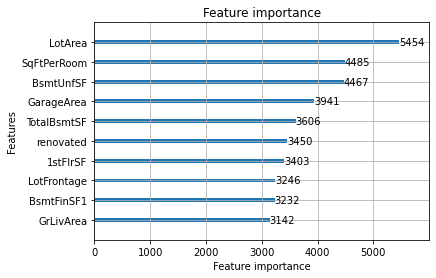

In [40]:
# plot feature importance
plt = lgb.plot_importance(l_gbm_model, max_num_features=10)
#import matplotlib as plt

plt.figure.savefig("figure_importance.png") # save as png

In [75]:
# Support Vector Regression
# https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2?gi=bad5aefbad71
svr = SVR()
score_svr = cv_rmse(svr)
print(score_svr.mean())
print(score_svr.std())
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

0.2655853695064804
0.018792690056241897


In [76]:
# grid search
from sklearn.model_selection import GridSearchCV
grid_para_svm = [{'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4]}, \
                 {'C': [1, 10, 100, 1000], 'kernel': ['linear']}, \
                 {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
# change c and degree to a higher value

In [ ]:
grid_search_svm = GridSearchCV(svr, grid_para_svm, scoring = 'neg_mean_squared_error', cv=10)
grid_search_svm.fit(X_train, target_log)

In [ ]:
grid_search_svm.best_params_

In [ ]:
svr2 = SVR(kernel='poly',C=1000, degree=4)
# based on the result of grid search
score2_svr = cv_rmse(svr2)
print(score2_svr.mean())
print(score2_svr.std())

In [ ]:
# compare score2 with score1, choose the model with lower mean for submission.
# score 1:0.26649
# score 2: 0.1686

In [ ]:
submission = pd.read_csv("sample_submission.csv")
svr_model=svr2.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(svr_model.predict(X_test)))
print(submission.head())
submission.to_csv("sub_svr.csv", index=False) 

In [ ]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
print(score_dtr.mean())
print(score_dtr.std())

In [ ]:
# prune the trees
# min_samples_split: The minimum number of samples required to split an internal node:
import sklearn.grid_search as gs
np.random.seed(1)
tree_model = tree.DecisionTreeRegressor()
grid_para_tree = [{"criterion": ["gini", "entropy"], "min_samples_leaf": [10,50,100]},"n_estimators": [100, 1000, 5000]]
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=10, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train,target_log)
print(grid_search_tree.best_params_)

In [ ]:
# please use grid search to decide the tuning parameters for decision tree regressor
# plot the feature importance
# choose the best model for submission

In [ ]:
# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
print(score_rfr.mean())
print(score_rfr.std())

In [ ]:
np.random.seed(1)
randomForest = ensemble.RandomForestRegressor() 
import sklearn.grid_search as gs
# max_feature: feature considered for splitting
# n_estimators: number of tree
# min_samples_split: The minimum number of samples required to split an internal node:
# min_samples_leaf: The minimum number of samples required to be at a leaf node

grid_para_forest = [{"n_estimators": [100, 1000, 5000], "criterion": ["gini", "entropy"], \
                    "min_samples_leaf": [10,50,100], "min_samples_split": [10,50,100],\
                    'max_features':[10,50,100]}] 
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='neg_mean_squared_error', cv=10)
grid_search_forest.fit(X_train,target_log)

In [ ]:
grid_search_forest.best_params_

In [ ]:
# please use grid search to decide the tuning parameters for  Random Forest Regressor
# plot the feature importance
# choose the best model for submission

In [ ]:
# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
print(score_gbr.mean())
print(score_gbr.std())

In [ ]:
param_test1 = {'n_estimators':[100, 1000, 5000]}
gsearch1 = gs.GridSearchCV(estimator =  GradientBoostingRegressor(learning_rate=0.1,random_state=10),
                        param_grid = param_test1, scoring='neg_mean_squared_error', cv=10)
gsearch1.fit(x_train, y_train)

In [ ]:
# follow tree codes for 6 steps

In [ ]:
# please use grid search to decide the tuning parameters for  Gradient Boost Regressor
# plot the feature importance
# choose the best model for submission

In [ ]:
# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
#https://catboost.ai/docs/concepts/python-reference_catboostregressor.html
print(score_catb.mean())
print(score_catb.std())

In [ ]:
submission = pd.read_csv("sample_submission.csv")
catb_model=catb.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(catb_model.predict(X_test)))
print(submission.head())
submission.to_csv("sub_catb.csv", index=False) 

In [ ]:
# XGB Regressor

xgb = XGBRegressor()
score_xgb = cv_rmse(xgb)
print(score_xgb.mean())
print(score_xgb.std())

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb

In [ ]:
def bayes_parameter_opt_xgb(X, y, init_round=3, opt_round=17, n_folds=10, seed=27, learning_rate=0.01,nthread=-1,scale_pos_weight=1):
    # prepare data
    train_data = xgb.DMatrix(X, label=y)
    # parameters
    def xgb_eval(max_depth, min_child_weight, gamma, subsample,colsample_bytree,reg_alpha):
        params = {'objective':'reg:squarederror', 'learning_rate':learning_rate,
                  'nthread':nthread,'scale_pos_weight':scale_pos_weight}
        params["max_depth"] = int(round(max_depth))
        params['min_child_weight']=min_child_weight
        params['gamma']=gamma
        params['subsample'] = max(min(subsample, 1), 0)
        params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
        params['reg_alpha']=reg_alpha
        cv_result = xgb.cv(params, train_data,num_boost_round=10000, nfold=n_folds, seed=seed, verbose_eval=100, metrics=['rmse'],early_stopping_rounds=50)
        return -1.0 * cv_result['test-rmse-mean'].iloc[-1]
    # range 
    xgbBO = BayesianOptimization(xgb_eval, {'max_depth': (1, 100), 
                                            'min_child_weight':(0,20),
                                            'gamma':(0,1),
                                            'reg_alpha':(0,1),
                                            'subsample' : (0.1,0.9),
                                            'colsample_bytree':(0.1,0.9)})
    # optimize
    xgbBO.maximize(init_points=init_round, n_iter=opt_round)

opt_params = bayes_parameter_opt_xgb(X_train,target_log, init_round=3, opt_round=17, n_folds=10, seed=27, learning_rate=0.01,nthread=-1,scale_pos_weight=1)

In [ ]:
xgb2 = XGBRegressor(learning_rate=0.01,
                       n_estimators=xx,
                       max_depth=xx,
                       min_child_weight=xx,
                       gamma=xx,
                       subsample=xx,
                       colsample_bytree=xx,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=xx )

In [ ]:
score_xgb = cv_rmse(xgb2)
print(score_xgb2.mean())
print(score_xgb2.std())

In [ ]:
# compare score2 with score1, choose the model with lower mean for submission.
# score 1:0.11658
# score 2: xx

In [ ]:
submission = pd.read_csv("sample_submission.csv")
xgb2_model=xgb2.fit(X_train,target_log)
submission.iloc[:,1] = np.floor(np.expm1(xgb2_model.predict(X_test)))
print(submission.head())
submission.to_csv("sub_xgb.csv", index=False) 

In [ ]:
# please use bayesian optimization to tune hyperparameters of xgb
#  plot the feature importance
# choose the best model for submission

In [ ]:
# arrange models' order based score from lowest to highest
# arrange models' order based submission score from lowest to highest

In [ ]:
# first model: try different boosting models  (catboost, lgb, xgboost, gbm), use the best parameter from the models
# second model: try different linear models except linear regreesion (bayesianridge, ridge, lasso),use the best parameter from the models

In [ ]:
# meta regressor is from boosting model

In [ ]:
# input: prediction result from two regressors, output: target
# build another meta regressor

In [ ]:
# try different arrangement

In [ ]:
#find best combination of stacking regressors
#Gradient Booster, XGB
#GradientBoostingRegressor    XGBRegressor

stack_gen = StackingRegressor(regressors=(GradientBoostingRegressor(), 
                                          XGBRegressor()),
                              meta_regressor = GradientBoostingRegressor(),  #which regressor gets majority
                              use_features_in_secondary = True)

In [ ]:
# no params for each model

In [ ]:
score_stack_gen = cv_rmse(stack_gen)
print(score_stack_gen.mean())
print(score_stack_gen.std())



# 0.08279143055492903
# 0.01901712515315616

In [ ]:
stack_gen.fit(X_train,target_log)

In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(stack_gen.predict(X_test)))
print(submission.head())
submission.to_csv("sub_stack1.csv", index=False) 

In [ ]:
# stack2: all use boosting tree models -> decision tree, random forest, all Boosting models

In [ ]:
#tree models
stack_gen2 = StackingRegressor(regressors=(Ridge(0.9982742660111498)), #change xx
                              meta_regressor = Ridge(),
                              use_features_in_secondary = True)

In [ ]:
# regressors should be 2 moodels

In [ ]:
score_stack_gen2 = cv_rmse(stack_gen2)
print(score_stack_gen2.mean())
print(score_stack_gen2.std())
# 0.08334753486572478
# 0.02026737369444918

In [ ]:
stack_gen2.fit(X_train,target_log)
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(stack_gen2.predict(X_test)))
print(submission.head())
submission.to_csv("sub_stack2.csv", index=False) 

In [ ]:
stack_gen3 = StackingRegressor(regressors=(svr2,
                                          ridge, lasso),
                              meta_regressor = Ridge(),
                              use_features_in_secondary = True)
stack_gen3.fit(X_train,target_log)
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(stack_gen2.predict(X_test)))
print(submission.head())
submission.to_csv("sub_stack2.csv", index=False)

In [ ]:
# regressors should be either one linear model and one boosting model
# or two boosting models
# meta-regressor is one boosting model